In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv("data/users_who_are_blocked_most_summary.csv")
players=pd.read_csv("data/players.csv")

In [2]:
players.index = players.username
players = players.to_dict(orient='index')

for key in ['chessTitle', 'countryName', 'averageElo']:
    df[key] = df.username.apply(lambda x: players[x][key] if x in players.keys() else None)
df['averageElo'] = df['averageElo'].fillna(0).astype(int)

df.head(30).style.set_caption("Players who are blocked most")

,username,players_played_count,blockedby_count,was_blocked_to_played_player_ratio,chessTitle,countryName,averageElo
0,stollenmonster,490,22,0.044898,CM,Russia,2832
1,Orest_Vovk,643,18,0.027994,FM,Ukraine,2521
2,vi_pranav,470,17,0.036170,GM,India,2996
3,Witik,665,16,0.024060,FM,Russia,2721
4,Rud_Makarian,536,15,0.027985,IM,Russia,2921
5,GoltsevDmitry2000,667,14,0.020990,FM,Russia,2717
6,Schattman,519,14,0.026975,FM,Italy,2394
7,alexrustemov,734,13,0.017711,GM,Russia,2834
8,guillembaches,659,13,0.019727,IM,Spain,2478
9,Jospem,626,13,0.020767,GM,Mexico,3033


In [3]:
df_moves=pd.read_csv("data/moves.csv")
df_moves['use'] = df_moves.apply(lambda x: (((x.game_result>0 and not x.did_flag) or (x.was_flagged)) and (x.move<=70)), axis=1)
df_moves

,Best Move,Best Move Eval,Real Move,Ranking Real Move,Real Move Eval,plycount,player,difference,move_timestamp,move_time,...,use,is_top1,is_top3,is_top5,move_timestamp_bin,is_endgame,game_length,pv_rank_top3,pv_rank_top2,pv_rank_top1
0,e2e4,0.38,e2e4,1,0.38,1,white,-0.00,177.3,3.7,...,False,True,True,True,0.1,False,37,1,1,1
1,e7e5,0.23,e7e5,1,0.23,2,black,0.00,176.7,4.3,...,True,True,True,True,0.1,False,37,1,1,1
2,g1f3,0.23,g1f3,1,0.23,3,white,-0.00,177.3,1.0,...,False,True,True,True,0.1,False,37,2,2,2
3,b8c6,0.28,b8c6,1,0.28,4,black,0.00,176.7,1.0,...,True,True,True,True,0.1,False,37,2,2,2
4,f1b5,0.28,f1c4,3,0.17,5,white,0.11,172.7,5.6,...,False,False,True,True,0.2,False,37,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14114898,c1d2,99.00,c1d2,1,99.00,73,white,0.00,61.1,1.2,...,True,True,True,True,2.0,True,39,20,5,3
14114899,h1h2,99.00,h1h2,1,99.00,74,black,0.00,3.7,1.0,...,False,True,True,True,3.0,True,38,4,4,4
14114900,d2e3,99.00,d2c3,2,99.00,75,white,0.00,61.6,0.5,...,True,False,True,True,2.0,True,39,21,6,0
14114901,h2c2,99.00,h2c2,1,99.00,76,black,0.00,3.2,1.5,...,False,True,True,True,3.0,True,38,5,5,5


In [4]:
df_moves.columns

Index(['Best Move', 'Best Move Eval', 'Real Move', 'Ranking Real Move',
       'Real Move Eval', 'plycount', 'player', 'difference', 'move_timestamp',
       'move_time', 'winning_chances', 'winning_chances_before',
       'move_accuracy', 'winning_chances_delta', 'judgement', 'game_id',
       'username', 'move', 'game_result', 'did_flag', 'was_flagged', 'ELO',
       'is_error', 'is_blunder', 'skip', 'use', 'is_top1', 'is_top3',
       'is_top5', 'move_timestamp_bin', 'is_endgame', 'game_length',
       'pv_rank_top3', 'pv_rank_top2', 'pv_rank_top1'],
      dtype='object')

In [5]:
df_moves_max_elo=df_moves.groupby('username',as_index=False)['ELO'].max()
df_moves_max_elo_sorted=df_moves_max_elo.sort_values(by='ELO',ascending=False)
df_moves_max_elo_sorted

,username,ELO
1380,MagnusCarlsen,3372
988,Hikaru,3335
3338,nihalsarin,3262
526,DanielNaroditsky,3210
1345,LyonBeast,3208
...,...,...
1556,NUESTRO64,1574
3045,juandiv,1500
2515,awayceiling,1452
1751,ProphetoftheLord,1334


In [6]:
criteria = df_moves.use

In [7]:
def get_move_accuracy_by_criteria(c):
    move_accuracy = df_moves[c].groupby(['username', 'move'])['move_accuracy'].mean()
    move_count = df_moves[c].groupby(['username', 'move'])['move_accuracy'].count()
    
    move_accuracy = move_accuracy[move_count>=10]
    return move_accuracy

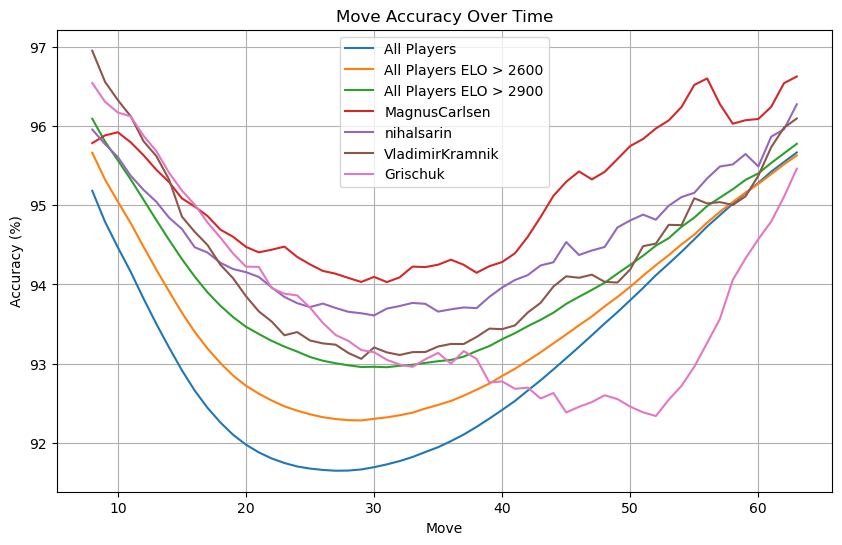

In [8]:
plt.figure(figsize=(10, 6))

sns.lineplot(data=df_moves[criteria].groupby(['move'])['move_accuracy'].mean().rolling(window=15, center=True).mean(), label='All Players')
sns.lineplot(data=df_moves[(criteria) & (df_moves.ELO>2600)].groupby(['move'])['move_accuracy'].mean().rolling(window=15, center=True).mean(), label='All Players ELO > 2600')
sns.lineplot(data=df_moves[(criteria) & (df_moves.ELO>2900)].groupby(['move'])['move_accuracy'].mean().rolling(window=15, center=True).mean(), label='All Players ELO > 2900')

for username in ['MagnusCarlsen', 'nihalsarin', 'VladimirKramnik', 'Grischuk']:

    sns.lineplot(data=get_move_accuracy_by_criteria(criteria)[username].rolling(window=15, center=True).mean(), label=username)


plt.title(f'Move Accuracy Over Time')
plt.xlabel('Move')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.show()

In [9]:
def get_blunder_ratio_by_criteria(c):
    blunder_ratio = df_moves[c].groupby(['username', 'move'])['is_blunder'].mean()
    move_count = df_moves[c].groupby(['username', 'move'])['is_blunder'].count()
    
    blunder_ratio = blunder_ratio[move_count>=10]
    return blunder_ratio

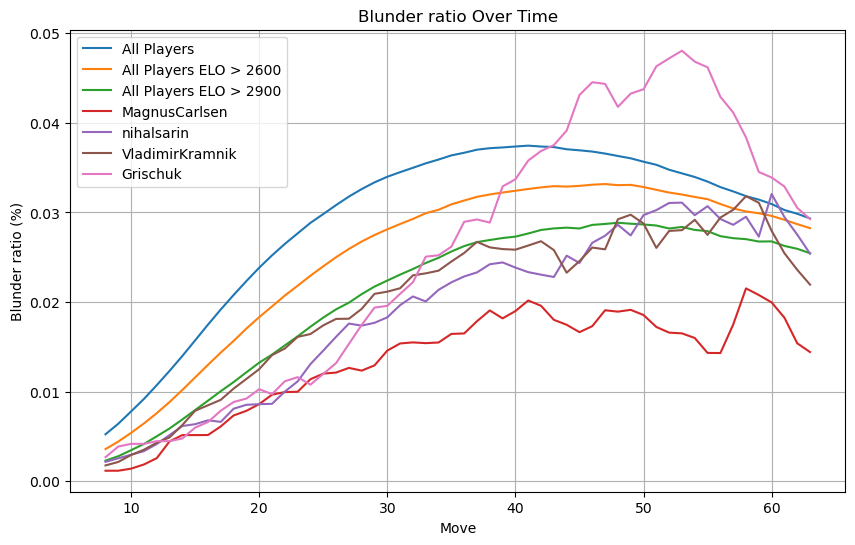

In [10]:
plt.figure(figsize=(10, 6))

sns.lineplot(data=df_moves[criteria].groupby(['move'])['is_blunder'].mean().rolling(window=15, center=True).mean(), label='All Players')
sns.lineplot(data=df_moves[(criteria) & (df_moves.ELO>2600)].groupby(['move'])['is_blunder'].mean().rolling(window=15, center=True).mean(), label='All Players ELO > 2600')
sns.lineplot(data=df_moves[(criteria) & (df_moves.ELO>2900)].groupby(['move'])['is_blunder'].mean().rolling(window=15, center=True).mean(), label='All Players ELO > 2900')

for username in ['MagnusCarlsen', 'nihalsarin', 'VladimirKramnik', 'Grischuk']:

    sns.lineplot(data=get_blunder_ratio_by_criteria(criteria)[username].rolling(window=15, center=True).mean(), label=username)


plt.title(f'Blunder ratio Over Time')
plt.xlabel('Move')
plt.ylabel('Blunder ratio (%)')
plt.grid(True)
plt.show()

In [11]:
def get_error_ratio_by_criteria(c):
    error_ratio = df_moves[c].groupby(['username', 'move'])['is_error'].mean()
    move_count = df_moves[c].groupby(['username', 'move'])['is_error'].count()
    
    error_ratio = error_ratio[move_count>=10]
    return error_ratio

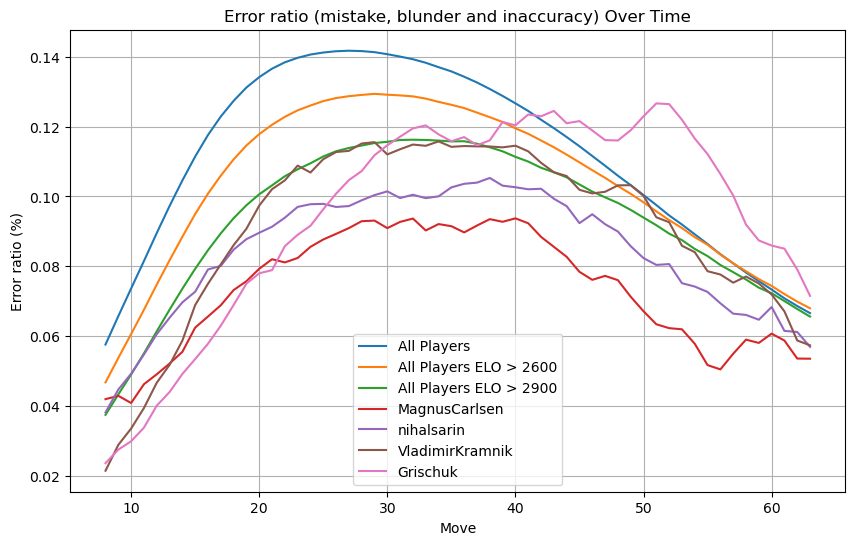

In [12]:
plt.figure(figsize=(10, 6))

sns.lineplot(data=df_moves[criteria].groupby(['move'])['is_error'].mean().rolling(window=15, center=True).mean(), label='All Players')
sns.lineplot(data=df_moves[(criteria) & (df_moves.ELO>2600)].groupby(['move'])['is_error'].mean().rolling(window=15, center=True).mean(), label='All Players ELO > 2600')
sns.lineplot(data=df_moves[(criteria) & (df_moves.ELO>2900)].groupby(['move'])['is_error'].mean().rolling(window=15, center=True).mean(), label='All Players ELO > 2900')

for username in ['MagnusCarlsen', 'nihalsarin', 'VladimirKramnik', 'Grischuk']:

    sns.lineplot(data=get_error_ratio_by_criteria(criteria)[username].rolling(window=15, center=True).mean(), label=username)


plt.title(f'Error ratio (mistake, blunder and inaccuracy) Over Time')
plt.xlabel('Move')
plt.ylabel('Error ratio (%)')
plt.grid(True)
plt.show()

In [13]:
def get_move_time_by_criteria(c):
    move_time = df_moves[c].groupby(['username', 'move'])['move_time'].mean()
    move_count = df_moves[c].groupby(['username', 'move'])['move_time'].count()
    
    move_time = move_time[move_count>=10]
    return move_time

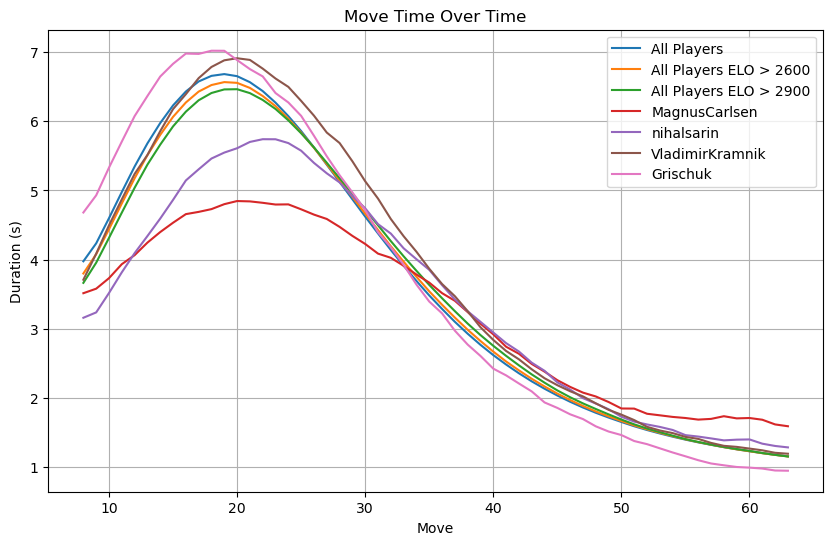

In [14]:
plt.figure(figsize=(10, 6))

sns.lineplot(data=df_moves[criteria].groupby(['move'])['move_time'].mean().rolling(window=15, center=True).mean(), label='All Players')
sns.lineplot(data=df_moves[(criteria) & (df_moves.ELO>2600)].groupby(['move'])['move_time'].mean().rolling(window=15, center=True).mean(), label='All Players ELO > 2600')
sns.lineplot(data=df_moves[(criteria) & (df_moves.ELO>2900)].groupby(['move'])['move_time'].mean().rolling(window=15, center=True).mean(), label='All Players ELO > 2900')

for username in ['MagnusCarlsen', 'nihalsarin', 'VladimirKramnik', 'Grischuk']:

    sns.lineplot(data=get_move_time_by_criteria(criteria)[username].rolling(window=15, center=True).mean(), label=username)


plt.title(f'Move Time Over Time')
plt.xlabel('Move')
plt.ylabel('Duration (s)')
plt.grid(True)
plt.show()

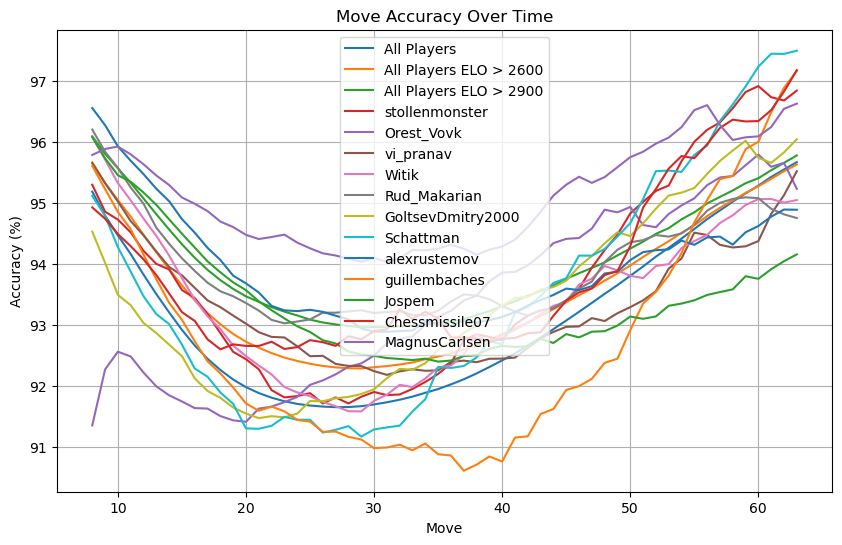

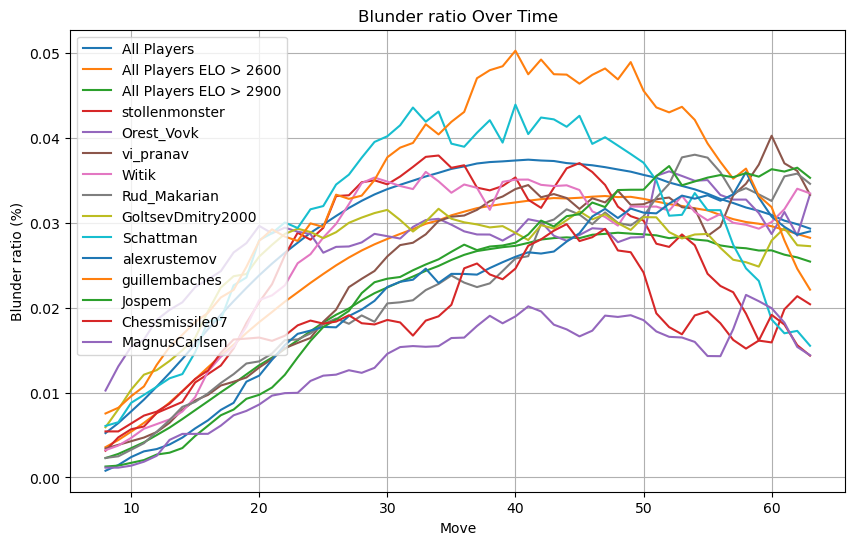

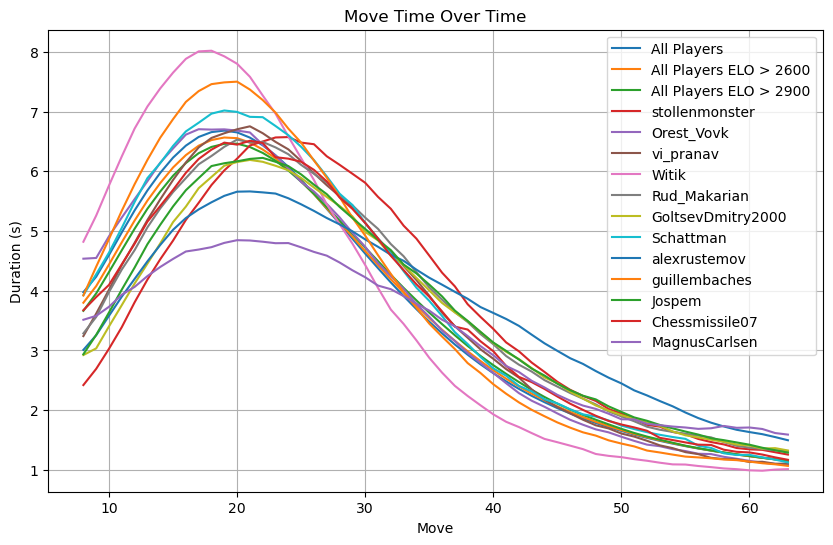

In [15]:
usernames = ['stollenmonster', 'Orest_Vovk', 'vi_pranav', 'Witik', 'Rud_Makarian', 
             'GoltsevDmitry2000', 'Schattman', 'alexrustemov', 'guillembaches', 
             'Jospem', 'Chessmissile07', 'MagnusCarlsen']

plt.figure(figsize=(10, 6))

sns.lineplot(data=df_moves[criteria].groupby(['move'])['move_accuracy'].mean().rolling(window=15, center=True).mean(), label='All Players')
sns.lineplot(data=df_moves[(criteria) & (df_moves.ELO>2600)].groupby(['move'])['move_accuracy'].mean().rolling(window=15, center=True).mean(), label='All Players ELO > 2600')
sns.lineplot(data=df_moves[(criteria) & (df_moves.ELO>2900)].groupby(['move'])['move_accuracy'].mean().rolling(window=15, center=True).mean(), label='All Players ELO > 2900')

for username in usernames:
    sns.lineplot(data=get_move_accuracy_by_criteria(criteria)[username].rolling(window=15, center=True).mean(), label=username)
    
plt.title(f'Move Accuracy Over Time')
plt.xlabel('Move')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))

sns.lineplot(data=df_moves[criteria].groupby(['move'])['is_blunder'].mean().rolling(window=15, center=True).mean(), label='All Players')
sns.lineplot(data=df_moves[(criteria) & (df_moves.ELO>2600)].groupby(['move'])['is_blunder'].mean().rolling(window=15, center=True).mean(), label='All Players ELO > 2600')
sns.lineplot(data=df_moves[(criteria) & (df_moves.ELO>2900)].groupby(['move'])['is_blunder'].mean().rolling(window=15, center=True).mean(), label='All Players ELO > 2900')

for username in usernames:
    sns.lineplot(data=get_blunder_ratio_by_criteria(criteria)[username].rolling(window=15, center=True).mean(), label=username)
    
plt.title(f'Blunder ratio Over Time')
plt.xlabel('Move')
plt.ylabel('Blunder ratio (%)')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))

sns.lineplot(data=df_moves[criteria].groupby(['move'])['move_time'].mean().rolling(window=15, center=True).mean(), label='All Players')
sns.lineplot(data=df_moves[(criteria) & (df_moves.ELO>2600)].groupby(['move'])['move_time'].mean().rolling(window=15, center=True).mean(), label='All Players ELO > 2600')
sns.lineplot(data=df_moves[(criteria) & (df_moves.ELO>2900)].groupby(['move'])['move_time'].mean().rolling(window=15, center=True).mean(), label='All Players ELO > 2900')

for username in usernames:
    sns.lineplot(data=get_move_time_by_criteria(criteria)[username].rolling(window=15, center=True).mean(), label=username)
    
plt.title(f'Move Time Over Time')
plt.xlabel('Move')
plt.ylabel('Duration (s)')
plt.grid(True)
plt.show()

In [16]:
NUMBER_OF_GAMES_THRESHOLD = 80

In [17]:
df_moves = df_moves[df_moves.use].copy().reset_index(drop=True)

df_moves

,Best Move,Best Move Eval,Real Move,Ranking Real Move,Real Move Eval,plycount,player,difference,move_timestamp,move_time,...,use,is_top1,is_top3,is_top5,move_timestamp_bin,is_endgame,game_length,pv_rank_top3,pv_rank_top2,pv_rank_top1
0,e7e5,0.23,e7e5,1,0.23,2,black,0.00,176.7,4.3,...,True,True,True,True,0.1,False,37,1,1,1
1,b8c6,0.28,b8c6,1,0.28,4,black,0.00,176.7,1.0,...,True,True,True,True,0.1,False,37,2,2,2
2,g8f6,0.14,f8c5,2,0.22,6,black,0.08,174.0,3.7,...,True,False,True,True,0.1,False,37,3,3,0
3,g8f6,0.09,d8e7,2,0.73,8,black,0.64,173.4,1.6,...,True,False,True,True,0.2,False,37,4,4,0
4,a7a6,0.85,g8f6,4,0.91,10,black,0.06,171.3,3.1,...,True,False,False,True,0.2,False,37,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7696320,e5d6,99.00,e5d6,1,99.00,69,white,0.00,62.1,0.6,...,True,True,True,True,2.0,True,39,18,3,1
7696321,c5b6,99.00,c5b6,1,99.00,71,white,0.00,61.3,1.8,...,True,True,True,True,2.0,True,39,19,4,2
7696322,c1d2,99.00,c1d2,1,99.00,73,white,0.00,61.1,1.2,...,True,True,True,True,2.0,True,39,20,5,3
7696323,d2e3,99.00,d2c3,2,99.00,75,white,0.00,61.6,0.5,...,True,False,True,True,2.0,True,39,21,6,0


In [18]:
def get_data(column='move_accuracy', groupby='move'):
    
    data = df_moves.groupby(['username', groupby])[column].mean()
    
    count = df_moves.groupby(['username', groupby])[column].count()
    
    data = data[count >= 10]

    return data

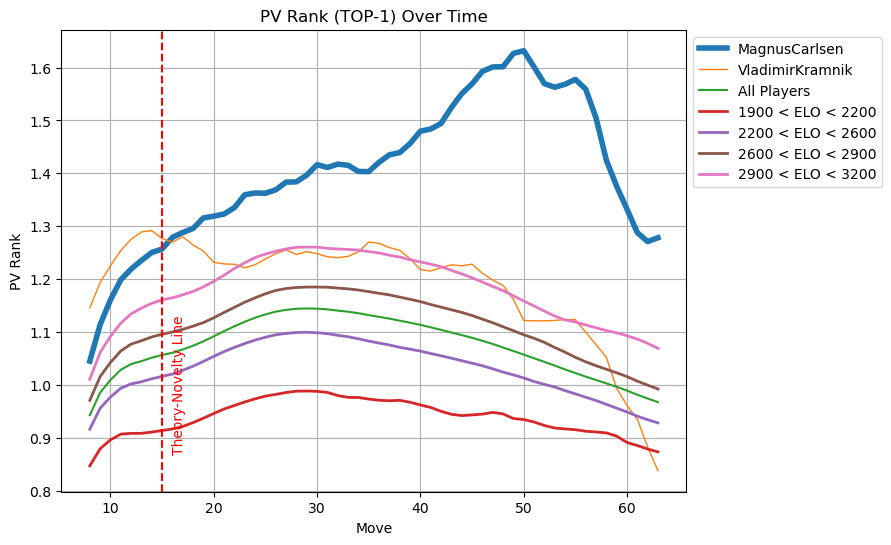

In [19]:
plt.figure(figsize=(10, 6))

data = get_data(column='pv_rank_top1', groupby='move')
sns.lineplot(data=data['MagnusCarlsen'].rolling(window=15, center=True).mean(), label='MagnusCarlsen', lw=4)
sns.lineplot(data=data['VladimirKramnik'].rolling(window=15, center=True).mean(), label='VladimirKramnik', lw=1)

sns.lineplot(data=df_moves.groupby('move')['pv_rank_top1'].mean().rolling(window=15, center=True).mean(), label='All Players')

for interval in [[1900, 2200], [2200, 2600], [2600, 2900], [2900, 3200]]:
    sns.lineplot(data=df_moves[(df_moves.ELO>interval[0])&(df_moves.ELO<interval[1])].groupby('move')['pv_rank_top1'].mean().rolling(window=15, center=True).mean(), label=f'{interval[0]} < ELO < {interval[1]}', lw=2)

plt.axvline(x=15, color='r', linestyle='--')

plt.text(16, 1, 'Theory-Novelty Line', rotation=90, verticalalignment='center', color='r')

plt.title(f'PV Rank (TOP-1) Over Time')
plt.xlabel('Move')
plt.ylabel('PV Rank')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.subplots_adjust(right=0.75)
plt.grid(True)
plt.show()

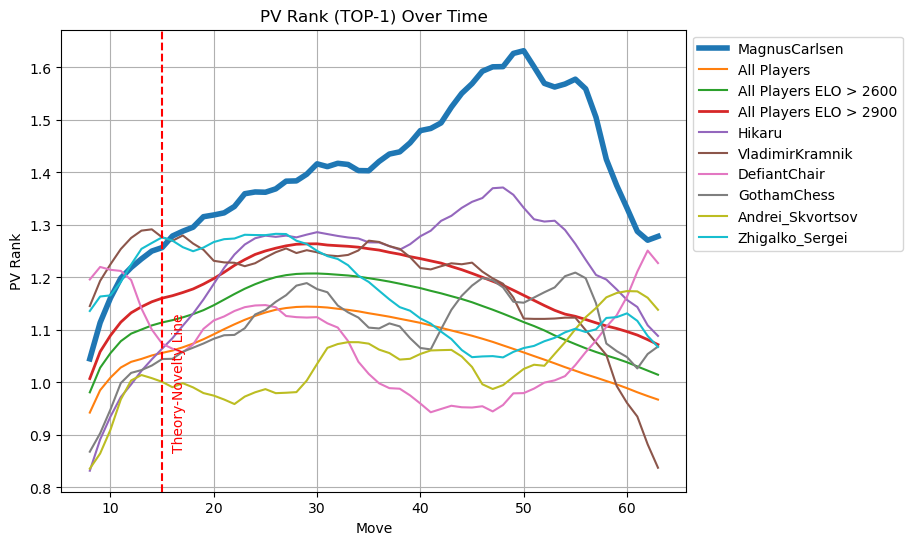

In [20]:
plt.figure(figsize=(10, 6))

sns.lineplot(data=data['MagnusCarlsen'].rolling(window=15, center=True).mean(), label='MagnusCarlsen', lw=4)

sns.lineplot(data=df_moves.groupby('move')['pv_rank_top1'].mean().rolling(window=15, center=True).mean(), label='All Players')
sns.lineplot(data=df_moves[df_moves.ELO>2600].groupby('move')['pv_rank_top1'].mean().rolling(window=15, center=True).mean(), label='All Players ELO > 2600')
sns.lineplot(data=df_moves[df_moves.ELO>2900].groupby('move')['pv_rank_top1'].mean().rolling(window=15, center=True).mean(), label='All Players ELO > 2900', lw=2)

for username in ['Hikaru', 'VladimirKramnik', 'DefiantChair', 'GothamChess', 'Andrei_Skvortsov', 'Zhigalko_Sergei']:
    sns.lineplot(data=data[username].rolling(window=15, center=True).mean(), label=username)

plt.axvline(x=15, color='r', linestyle='--')

plt.text(16, 1, 'Theory-Novelty Line', rotation=90, verticalalignment='center', color='r')

plt.title(f'PV Rank (TOP-1) Over Time')
plt.xlabel('Move')
plt.ylabel('PV Rank')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.subplots_adjust(right=0.75)
plt.grid(True)
plt.show()

In [21]:
players = pd.read_csv('data/players.csv')
players.index = players.username
games_played = df_moves[df_moves.move==1].groupby('username').count()['move'].to_dict()
players['games_played'] = players.username.apply(lambda x: games_played[x] if x in games_played.keys() else 0)

Not enough data maurovargas01. Skipping
Not enough data PNEPaul. Skipping


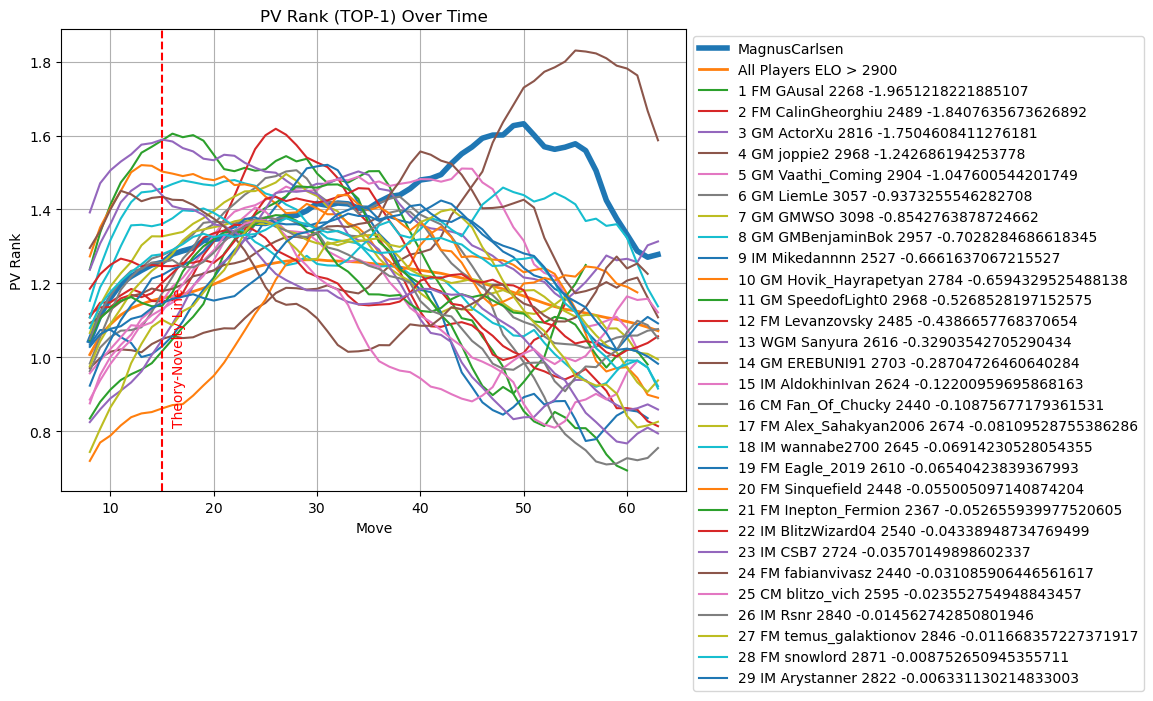

In [22]:
plt.figure(figsize=(10, 6))

sns.lineplot(data=data['MagnusCarlsen'].rolling(window=15, center=True).mean(), label='MagnusCarlsen', lw=4)
sns.lineplot(data=df_moves[df_moves.ELO>2900].groupby('move')['pv_rank_top1'].mean().rolling(window=15, center=True).mean(), label='All Players ELO > 2900', lw=2)

sus_players1=[]

diffs = dict()
for idx, r in players[players.games_played>NUMBER_OF_GAMES_THRESHOLD].iterrows():
    if r.username == 'MagnusCarlsen':
        continue
        
    def interpolate(s):
        s = s.reindex(range(1, s.index.max() + 1))
        s_interpolated = s.interpolate(method='linear')
        return s_interpolated.values[20:55]
    
    try:
        diff = interpolate(data['MagnusCarlsen'].rolling(window=15, center=True).mean()) - interpolate(data[r.username].rolling(window=15, center=True).mean())
    except:
        print(f"Not enough data {r.username}. Skipping")
        
    if diff[diff<0].shape[0] > 0:
        diffs[r.username] = { 'diff': diff[diff<0].sum(), 'chessTitle': r.chessTitle, 'averageElo': r.averageElo, 'username': r.username }
        
count = 0
for r in sorted(diffs, key=lambda key: diffs[key]['diff']):
    r = diffs[r]
    if r["diff"] > -0.11 and r["chessTitle"]=="GM":
        continue
    count += 1
    sns.lineplot(data=data[r["username"]].rolling(window=15, center=True).mean(), label=f'{count} {r["chessTitle"]} {r["username"]} {r["averageElo"]} {r["diff"]}')
    sus_players1.append(r['username'])
    
plt.axvline(x=15, color='r', linestyle='--')
plt.text(16, 1, 'Theory-Novelty Line', rotation=90, verticalalignment='center', color='r')

plt.title(f'PV Rank (TOP-1) Over Time')
plt.xlabel('Move')
plt.ylabel('PV Rank')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.subplots_adjust(right=0.75)
plt.grid(True)
plt.show()

Not enough data maurovargas01. Skipping
Not enough data PNEPaul. Skipping


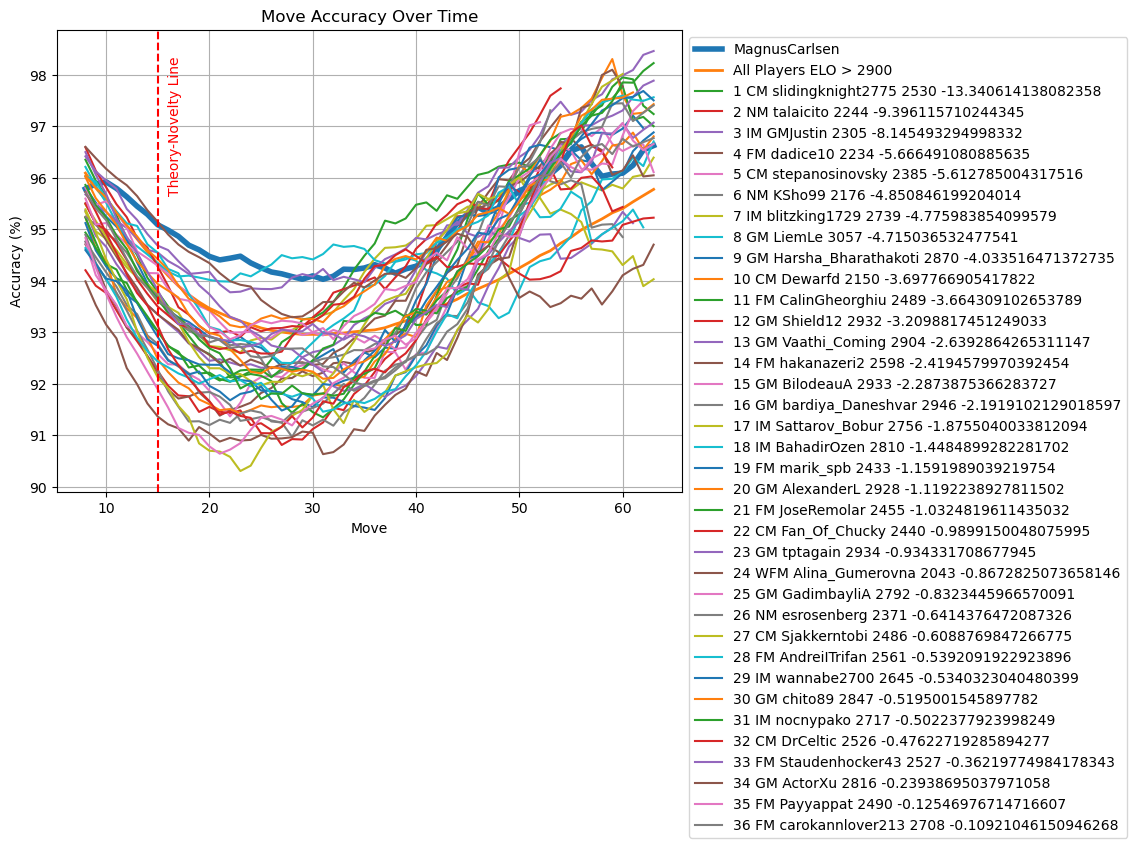

In [23]:
data = get_data(column='move_accuracy', groupby='move')

plt.figure(figsize=(10, 6))

sns.lineplot(data=data['MagnusCarlsen'].rolling(window=15, center=True).mean(), label='MagnusCarlsen', lw=4)
sns.lineplot(data=df_moves[df_moves.ELO>2900].groupby('move')['move_accuracy'].mean().rolling(window=15, center=True).mean(), label='All Players ELO > 2900', lw=2)

sus_players2=[]

diffs = dict()
for idx, r in players[players.games_played>NUMBER_OF_GAMES_THRESHOLD].iterrows():
    if r.username == 'MagnusCarlsen':
        continue
        
    def interpolate(s):
        s = s.reindex(range(1, s.index.max() + 1))
        s_interpolated = s.interpolate(method='linear')
        return s_interpolated.values[20:55]

    try:
        diff = interpolate(data['MagnusCarlsen'].rolling(window=15, center=True).mean()) - interpolate(data[r.username].rolling(window=15, center=True).mean())
    except:
        print(f"Not enough data {r.username}. Skipping")
        
    if diff[diff<0].shape[0] > 0:
        diffs[r.username] = { 'diff': diff[diff<0].sum(), 'chessTitle': r.chessTitle, 'averageElo': r.averageElo, 'username': r.username }
        
count = 0
for r in sorted(diffs, key=lambda key: diffs[key]['diff']):
    r = diffs[r]
    if r["diff"] > -0.1:
        continue
    sus_players2.append(r['username'])
    count += 1
    sns.lineplot(data=data[r["username"]].rolling(window=15, center=True).mean(), label=f'{count} {r["chessTitle"]} {r["username"]} {r["averageElo"]} {r["diff"]}')

plt.axvline(x=15, color='r', linestyle='--')
plt.text(16, 97, 'Theory-Novelty Line', rotation=90, verticalalignment='center', color='r')

plt.title(f'Move Accuracy Over Time')
plt.xlabel('Move')
plt.ylabel('Accuracy (%)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.subplots_adjust(right=0.75)
plt.grid(True)
plt.show()

Not enough data maurovargas01. Skipping
Not enough data PNEPaul. Skipping


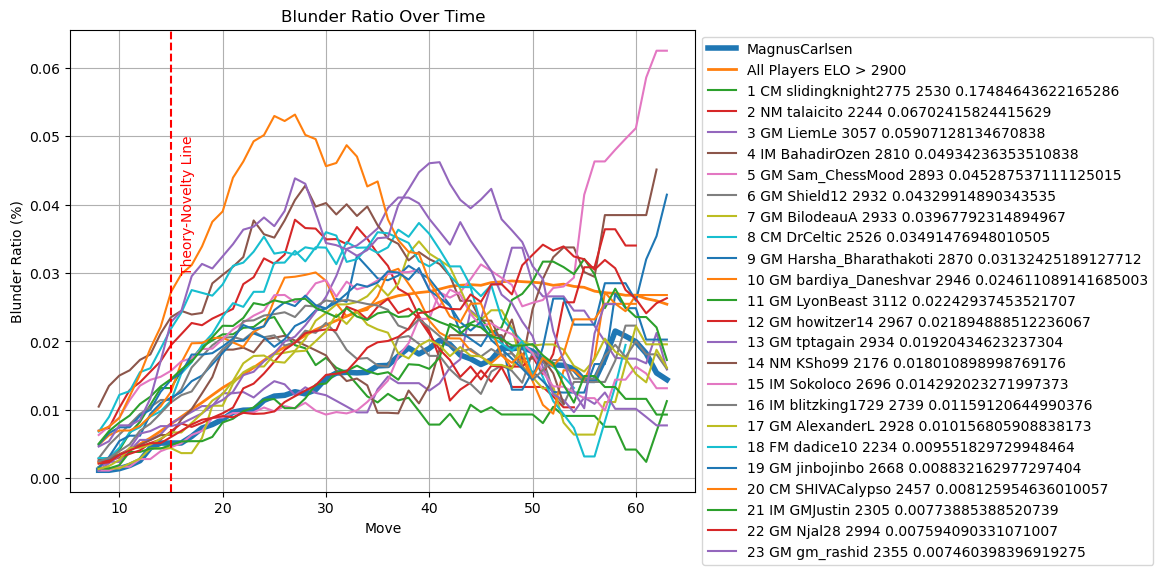

In [24]:
data = get_data(column='is_blunder', groupby='move')

plt.figure(figsize=(10, 6))

sns.lineplot(data=data['MagnusCarlsen'].rolling(window=15, center=True).mean(), label='MagnusCarlsen', lw=4)
sns.lineplot(data=df_moves[df_moves.ELO>2900].groupby('move')['is_blunder'].mean().rolling(window=15, center=True).mean(), label='All Players ELO > 2900', lw=2)

sus_players3=[]

diffs = dict()
for idx, r in players[players.games_played>NUMBER_OF_GAMES_THRESHOLD].iterrows():
    if r.username == 'MagnusCarlsen':
        continue
        
    def interpolate(s):
        s = s.reindex(range(1, s.index.max() + 1))
        s_interpolated = s.interpolate(method='linear')
        return s_interpolated.values[20:55]

    try:
        diff = interpolate(data['MagnusCarlsen'].rolling(window=15, center=True).mean()) - interpolate(data[r.username].rolling(window=15, center=True).mean())
    except:
        print(f"Not enough data {r.username}. Skipping")
        
    if diff[diff>0].shape[0] > 0:
        diffs[r.username] = { 'diff': diff[diff>0].sum(), 'chessTitle': r.chessTitle, 'averageElo': r.averageElo, 'username': r.username }
        
count = 0
for r in sorted(diffs, key=lambda key: diffs[key]['diff'], reverse=True):
    r = diffs[r]
    if r["diff"] < 0.007:
        continue
    sus_players3.append(r['username'])
    count += 1
    sns.lineplot(data=data[r["username"]].rolling(window=15, center=True).mean(), label=f'{count} {r["chessTitle"]} {r["username"]} {r["averageElo"]} {r["diff"]}')

plt.axvline(x=15, color='r', linestyle='--')
plt.text(16, 0.04, 'Theory-Novelty Line', rotation=90, verticalalignment='center', color='r')

plt.title('Blunder Ratio Over Time')
plt.xlabel('Move')
plt.ylabel('Blunder Ratio (%)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.subplots_adjust(right=0.75)
plt.grid(True)
plt.show()

Not enough data maurovargas01. Skipping
Not enough data PNEPaul. Skipping


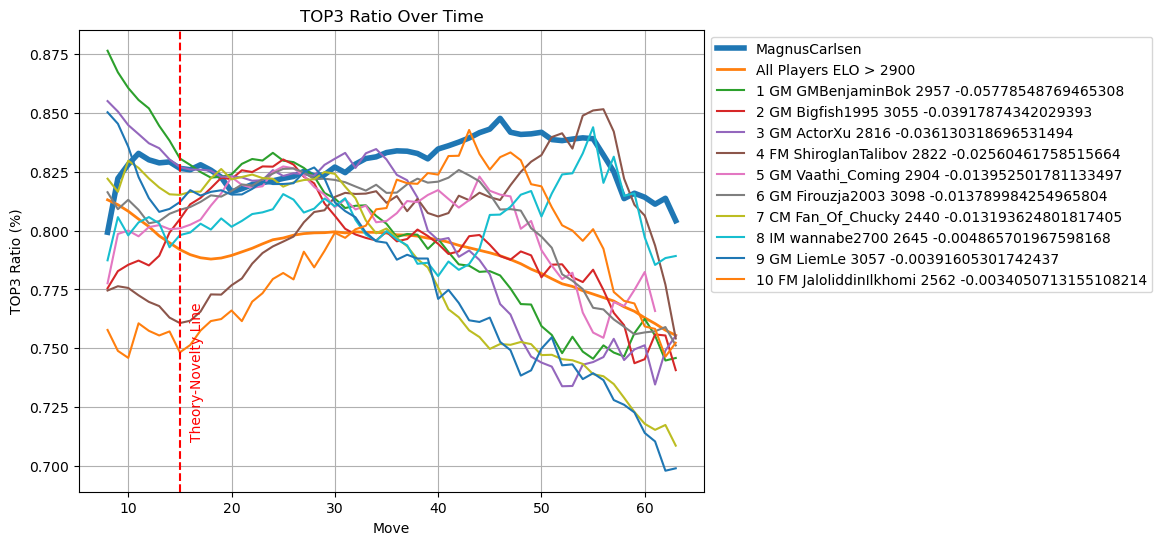

In [25]:
data = get_data(column='is_top3', groupby='move')

plt.figure(figsize=(10, 6))

sns.lineplot(data=data['MagnusCarlsen'].rolling(window=15, center=True).mean(), label='MagnusCarlsen', lw=4)
sns.lineplot(data=df_moves[df_moves.ELO>2900].groupby('move')['is_top3'].mean().rolling(window=15, center=True).mean(), label='All Players ELO > 2900', lw=2)

sus_players4=[]

diffs = dict()
for idx, r in players[players.games_played>NUMBER_OF_GAMES_THRESHOLD].iterrows():
    if r.username == 'MagnusCarlsen':
        continue
        
    def interpolate(s):
        s = s.reindex(range(1, s.index.max() + 1))
        s_interpolated = s.interpolate(method='linear')
        return s_interpolated.values[20:55]

    try:
        diff = interpolate(data['MagnusCarlsen'].rolling(window=15, center=True).mean()) - interpolate(data[r.username].rolling(window=15, center=True).mean())
    except:
        print(f"Not enough data {r.username}. Skipping")
        
    if diff[diff<0].shape[0] > 0:
        diffs[r.username] = { 'diff': diff[diff<0].sum(), 'chessTitle': r.chessTitle, 'averageElo': r.averageElo, 'username': r.username }
        
count = 0
for r in sorted(diffs, key=lambda key: diffs[key]['diff'], reverse=False)[:20]:
    r = diffs[r]
    count += 1
    sus_players4.append(r['username'])
    sns.lineplot(data=data[r["username"]].rolling(window=15, center=True).mean(), label=f'{count} {r["chessTitle"]} {r["username"]} {r["averageElo"]} {r["diff"]}')

plt.axvline(x=15, color='r', linestyle='--')
plt.text(16, 0.74, 'Theory-Novelty Line', rotation=90, verticalalignment='center', color='r')

plt.title('TOP3 Ratio Over Time')
plt.xlabel('Move')
plt.ylabel('TOP3 Ratio (%)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.subplots_adjust(right=0.75)
plt.grid(True)
plt.show()

In [26]:
sus_players1

['GAusal',
 'CalinGheorghiu',
 'ActorXu',
 'joppie2',
 'Vaathi_Coming',
 'LiemLe',
 'GMWSO',
 'GMBenjaminBok',
 'Mikedannnn',
 'Hovik_Hayrapetyan',
 'SpeedofLight0',
 'Levanzovsky',
 'Sanyura',
 'EREBUNI91',
 'AldokhinIvan',
 'Fan_Of_Chucky',
 'Alex_Sahakyan2006',
 'wannabe2700',
 'Eagle_2019',
 'Sinquefield',
 'Inepton_Fermion',
 'BlitzWizard04',
 'CSB7',
 'fabianvivasz',
 'blitzo_vich',
 'Rsnr',
 'temus_galaktionov',
 'snowlord',
 'Arystanner']

In [27]:
sus_players2

['slidingknight2775',
 'talaicito',
 'GMJustin',
 'dadice10',
 'stepanosinovsky',
 'KSho99',
 'blitzking1729',
 'LiemLe',
 'Harsha_Bharathakoti',
 'Dewarfd',
 'CalinGheorghiu',
 'Shield12',
 'Vaathi_Coming',
 'hakanazeri2',
 'BilodeauA',
 'bardiya_Daneshvar',
 'Sattarov_Bobur',
 'BahadirOzen',
 'marik_spb',
 'AlexanderL',
 'JoseRemolar',
 'Fan_Of_Chucky',
 'tptagain',
 'Alina_Gumerovna',
 'GadimbayliA',
 'esrosenberg',
 'Sjakkerntobi',
 'AndreiITrifan',
 'wannabe2700',
 'chito89',
 'nocnypako',
 'DrCeltic',
 'Staudenhocker43',
 'ActorXu',
 'Payyappat',
 'carokannlover213']

In [28]:
sus_players3

['slidingknight2775',
 'talaicito',
 'LiemLe',
 'BahadirOzen',
 'Sam_ChessMood',
 'Shield12',
 'BilodeauA',
 'DrCeltic',
 'Harsha_Bharathakoti',
 'bardiya_Daneshvar',
 'LyonBeast',
 'howitzer14',
 'tptagain',
 'KSho99',
 'Sokoloco',
 'blitzking1729',
 'AlexanderL',
 'dadice10',
 'jinbojinbo',
 'SHIVACalypso',
 'GMJustin',
 'Njal28',
 'gm_rashid']

In [29]:
sus_players4

['GMBenjaminBok',
 'Bigfish1995',
 'ActorXu',
 'ShiroglanTalibov',
 'Vaathi_Coming',
 'Firouzja2003',
 'Fan_Of_Chucky',
 'wannabe2700',
 'LiemLe',
 'JaloliddinIlkhomi']

In [30]:
sus_players=set(sus_players1+sus_players2+sus_players3+sus_players4)
sus_players=list(sus_players)

In [31]:
sus_players

['GMJustin',
 'esrosenberg',
 'AldokhinIvan',
 'Inepton_Fermion',
 'ActorXu',
 'DrCeltic',
 'GAusal',
 'LyonBeast',
 'SpeedofLight0',
 'nocnypako',
 'Vaathi_Coming',
 'Levanzovsky',
 'snowlord',
 'BilodeauA',
 'Alina_Gumerovna',
 'joppie2',
 'Mikedannnn',
 'Sinquefield',
 'LiemLe',
 'fabianvivasz',
 'carokannlover213',
 'tptagain',
 'GadimbayliA',
 'CSB7',
 'marik_spb',
 'BahadirOzen',
 'blitzking1729',
 'gm_rashid',
 'ShiroglanTalibov',
 'dadice10',
 'bardiya_Daneshvar',
 'Dewarfd',
 'Rsnr',
 'AlexanderL',
 'Staudenhocker43',
 'hakanazeri2',
 'Hovik_Hayrapetyan',
 'Shield12',
 'Sokoloco',
 'temus_galaktionov',
 'Fan_Of_Chucky',
 'Sam_ChessMood',
 'jinbojinbo',
 'Sanyura',
 'EREBUNI91',
 'Alex_Sahakyan2006',
 'BlitzWizard04',
 'JoseRemolar',
 'AndreiITrifan',
 'wannabe2700',
 'Njal28',
 'Payyappat',
 'GMBenjaminBok',
 'Sjakkerntobi',
 'Eagle_2019',
 'KSho99',
 'slidingknight2775',
 'Bigfish1995',
 'blitzo_vich',
 'CalinGheorghiu',
 'Harsha_Bharathakoti',
 'Firouzja2003',
 'GMWSO',
 'st